# 1. Introduction
During this week, we learn how to create descriptive graphs in Python using `seaborn`. Although you also need to know how to set up the details using `matplotlib` to perfectly customize your graphs as you want, creating a quick draft figures using `seaborn` is always a good way to explore your data. 

For our practices, we use the following dataset: ["World Happiness Report 2005~2020"](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021?select=world-happiness-report.csv) by Gallup World Poll. According to the introduction page in *Kaggle*, 

> The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

The basic structure of the dataset is explained as,

> The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

Of course, feel free to explore and check the basic structure (columns, number of rows, NaN values...) first by your self using all the methods of `pandas` that we have learned so far.

In [1]:
import pandas as pd 
import seaborn as sns

# 2. Reading the target file


In [95]:
# Your code for the file path
f_folder = "C:/Users/Admin/Downloads/ppor1/"

f_name = "world-happiness-report.csv"

f_path = f_folder + f_name

In [96]:
# Read the file using pandas
WHR_df = pd.read_csv(f_path)

In [97]:
# Print the list of columns
WHR_df.columns
# Print the first 5 lines to see how it looks like
WHR_df.head()


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


# 3. Bar plot

Bar plot is one of the most common plot that you can find in various formats, including academic papers, news articles, government reports, and etc, due to its simplicity.

Bar plot would be a good choice when you want to compare the values of a continuous variable across different categories. In this practice, we compare **"Healthy life expectancy at birth"** in 2005 across counties who have the value in 2005. 

In [23]:
# First, create a sub dataset only including the information of 2005, 
# and the countries not having NaN value for "Healthy life expectancy at birth" 
bar_df = WHR_df.loc[WHR_df['year']==2005]
#print(bar_df)
bar_df1 = bar_df.dropna(subset=['Healthy life expectancy at birth'])                 
#print(bar_df1)
# Print the unique value of years in the new dataset to check you filtered correctly
print(bar_df1.year.unique())
# Print the descriptive stat to see if "Healthy life expectancy at birth" column
print(bar_df1.describe())
# does not have NaN value, again, to check you filtered correctly
bar_df1.isnull().sum()


[2005]
         year  Life Ladder  Log GDP per capita  Social support  \
count    27.0    27.000000           27.000000       27.000000   
mean   2005.0     6.446259           10.118667        0.897407   
std       0.0     0.919129            0.690141        0.084185   
min    2005.0     4.719000            8.218000        0.591000   
25%    2005.0     5.539000            9.644500        0.858000   
50%    2005.0     6.620000           10.462000        0.928000   
75%    2005.0     7.161500           10.676000        0.953000   
max    2005.0     8.019000           10.851000        0.979000   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                         27.000000                     25.000000   
mean                          67.007407                      0.829520   
std                            4.549719                      0.105477   
min                           54.200000                      0.623000   
25%                           63.

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   0
Social support                       0
Healthy life expectancy at birth     0
Freedom to make life choices         2
Generosity                          26
Perceptions of corruption            2
Positive affect                      1
Negative affect                      1
dtype: int64

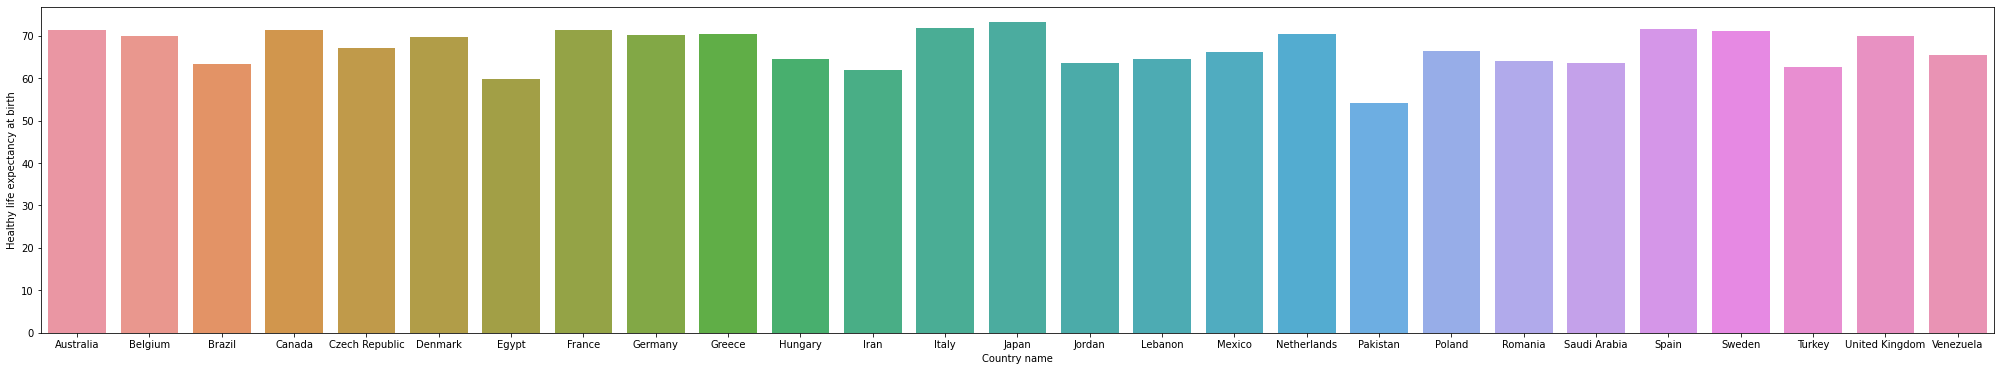

In [33]:
# Draw the graph using seaborn.barplot(), where x-axis is the name of countries
# and y-axis is the value of "Healthy life expectancy at birth"
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(35,6))
ax = sns.barplot(x = "Country name", y = "Healthy life expectancy at birth", data=bar_df1)


In [57]:
# Which country has the highest healthy life expectancy, while which country has the lowest?
life_exp = bar_df1[["Country name", "Healthy life expectancy at birth"]]
life_exp = pd.DataFrame(life_exp)
life_exp1 = life_exp.set_index('Country name')
#print(life_exp1)
my_max = life_exp1.idxmax()   # Maximum in column
print(my_max)
my_min = life_exp1.idxmin()   # Minimum in column
print(my_min)

Healthy life expectancy at birth    Japan
dtype: object
Healthy life expectancy at birth    Pakistan
dtype: object


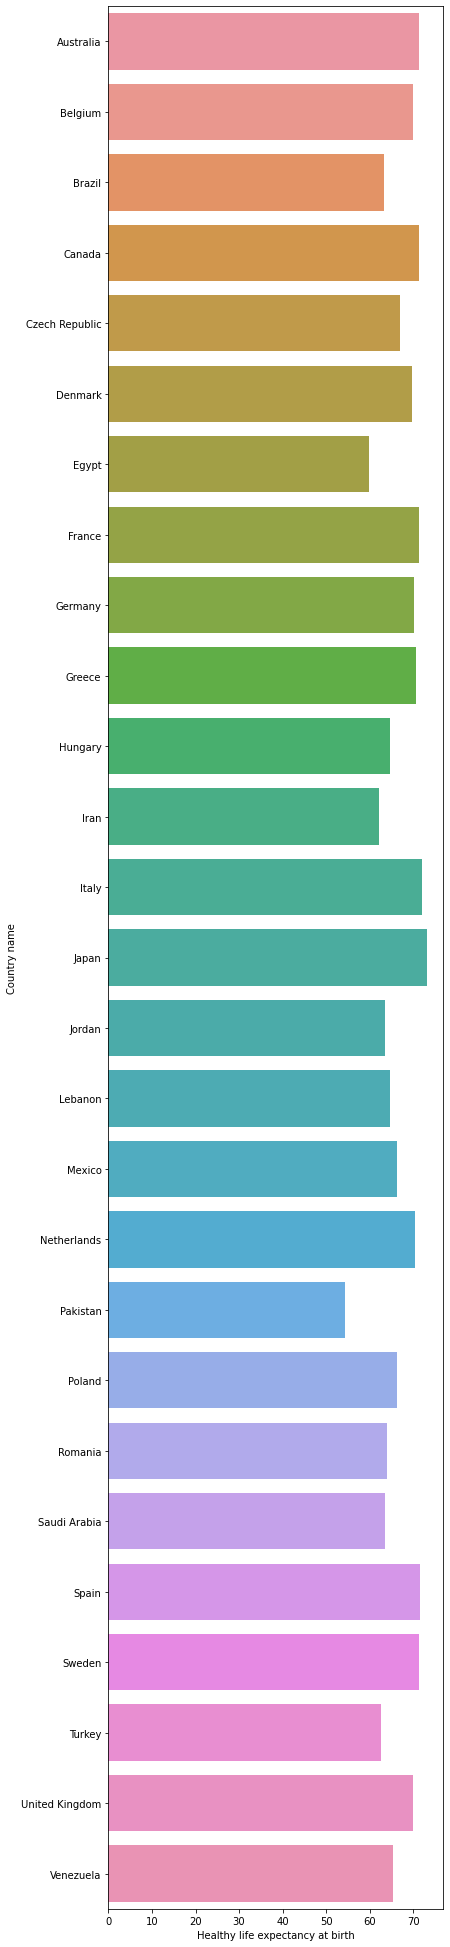

In [58]:
# Now, draw the same figure but horizontally. 
# You can do it by exchanging the column name for x-axis with that for y-axis
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(6,35))
ax = sns.barplot(x = "Healthy life expectancy at birth", y = "Country name", data=bar_df1)




# 4. Line plot

Line plot is another plot that you can find easily in various areas. When you want to check or show the trend of a continous or an ordinal value over time, you can use line plot. By adding lines, you can compare the trend of multiple categories, like for different countries, gender, age-group, and etc. 

In this practice, we first draw the trend of the "Perceptions of corruptions" of a specific country over time. Then, we compare the trend among five different countries that you choose. 

First, print the list of countries in our dataset. 

In [61]:
# Print the list of unique countries in the dataset
print(WHR_df['Country name'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong S.A.R. of China' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg'
 'Madagascar' 'Malawi' 'Malay

Is your country in the list? Then, you can choose your country. Unless, you can choose any country that you're interested in. Create a new sub-dataset only about the country you choose.

In [85]:
# Create a dataset only including the information of the country
line_df = WHR_df.loc[WHR_df['Country name']== "Thailand"]
#print(line_df)
line_df.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [71]:
# Print the list of unique countries in the new dataset, 
# to check the result only includes the country that you choose. 
print(line_df['Country name'].unique())

['Thailand']


Okay, now let's draw a line plot to show the trend of "Perceptions of corruptions" over time. Using seaborn's `lineplot()` methods, draw a line plot where x-axis represents years and y-axis represents the value of "Perceptions of corruptions" of the country that you chose.


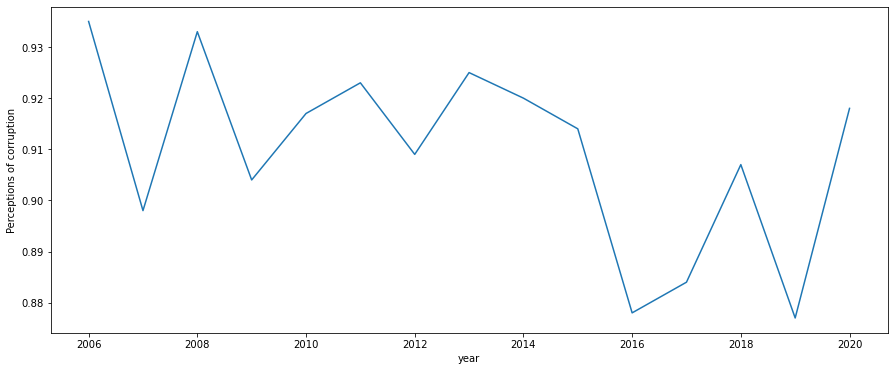

In [86]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))
ax = sns.lineplot(x = "year", y = "Perceptions of corruption", data=line_df)


Let's extend our ability to draw more complicated figures. Again, among the list of countries in our dataset (that you printed above), choose four more countries that you're interested in or that you want to compare with your own country. Ready?

Then, create a Python list including the names of the five countries. After that, filter the dataset to only have the records for the five countries. You can use `isin()` method of Pandas to filter a dataset based on the value of a specific column to have one of the values in a given list. [This](https://stackoverflow.com/questions/19960077/how-to-filter-pandas-dataframe-using-in-and-not-in-like-in-sql) is a hint in *Stackoverflow*.

In [83]:
# Make a list of the five countries you're interested in 
target_countries = ["Thailand", "Vietnam", "Indonesia", "Malaysia", "Philippines"]

# Create a new dataset only incluing the records of the five countries utilizing "isin()"
rslt_df = WHR_df[WHR_df['Country name'].isin(countries)] 
print(rslt_df['Country name'].unique())

['Indonesia' 'Malaysia' 'Philippines' 'Thailand' 'Vietnam']


Now, let's create the figure of the five countries! Draw a line plot, where x-axis and y-axis are same as above (for one country) but adding a new argument `hue` with setting `Country name`, to draw the lines with different colors for different countries.

<AxesSubplot:xlabel='year', ylabel='Perceptions of corruption'>

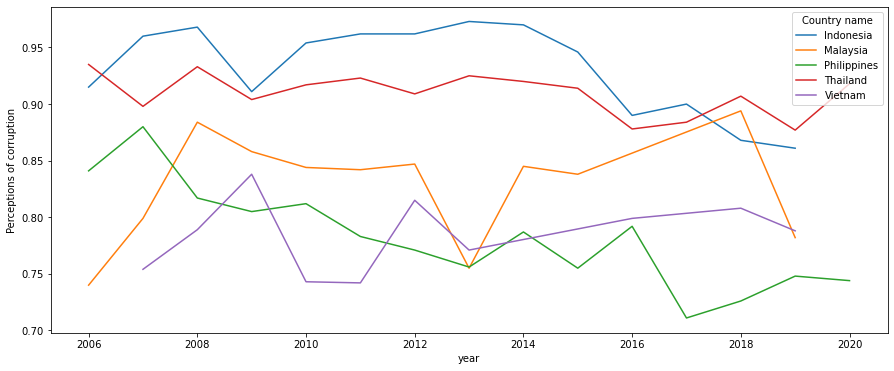

In [89]:
plt.figure(figsize=(15,6))
sns.lineplot(data=rslt_df, x="year", y = "Perceptions of corruption", hue="Country name")

# 5. Scatter plot

The last type of graph that we practice today is scatter plot, where dots representing records are scattered in a coordinate. Scatter plot is useful when your target records consist of two continous variables and are independent to each other. You can group the dots by assigning different colors for different groups, which we try in the second practice in this section.

In this section, we check the relationship between "Generosity" and "Social Support" across all countries. We first check the relationship only with the 2020's records. Then, we plot the relationship for three recent years (2018 to 2020) with coloring them diffently.


In [102]:
# Create a sub dataset only including the records of 2020
scatter_df = WHR_df.loc[WHR_df['year']== 2020]


<AxesSubplot:xlabel='Generosity', ylabel='Social support'>

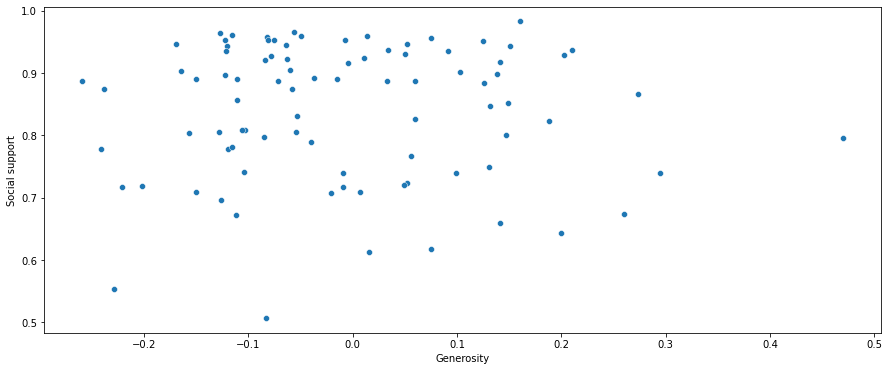

In [103]:
# Draw a scatter plot using `scatterplot()`, where x-axis is for "Generosity" and y-axis is for "Social support".  
plt.figure(figsize=(15,6))
sns.scatterplot(data=scatter_df, x="Generosity", y="Social support")

Finally, let's draw the same figure but for three years (2018 to 2020) with coloring them differently. First, you create another sub-dataset only having the records from 2018 to 2020 with this [hint](https://stackoverflow.com/questions/31617845/how-to-select-rows-in-a-dataframe-between-two-values-in-python-pandas).

In [110]:
# Create a new dataset having the records between 2018 to 2020
scatter_df = WHR_df.loc[WHR_df['year'].isin([2018,2019,2020])]


<AxesSubplot:xlabel='Generosity', ylabel='Social support'>

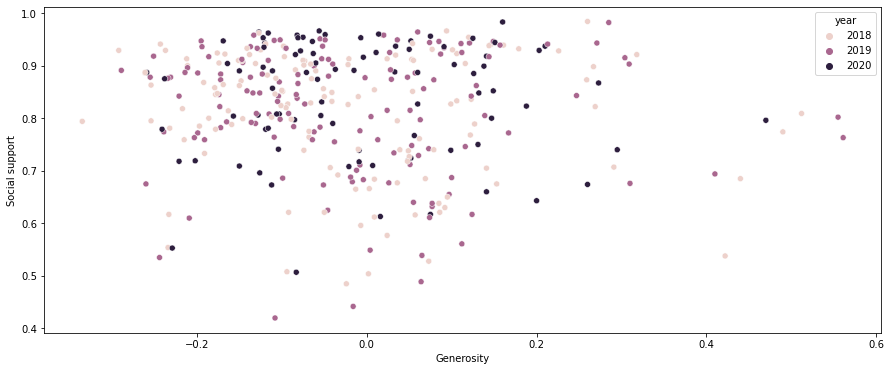

In [111]:
# Draw a scatter plot having the same x-axis and y-axis 
# but different colors for different years, using "hue" argument as you did in the line plot
plt.figure(figsize=(15,6))
sns.scatterplot(data=scatter_df, x="Generosity", y="Social support", hue= "year")


**Quick additional bonus practice!!**

For the dataset only including the 2020's records, can you print out a correlation matrix between all numerical variables? Which pairs of the factors have the highest and lowest correlation coefficients?

In [116]:
bonus_df = WHR_df.loc[WHR_df['year']== 2020]

In [117]:
bonus_df.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Life Ladder,NaN,1.000000,0.842165,0.772644,0.736172,0.541225,-0.061580,-0.510701,0.377856,-0.549045
Log GDP per capita,NaN,0.842165,1.000000,0.744688,0.844387,0.370288,-0.245638,-0.456712,0.180190,-0.471285
Social support,NaN,0.772644,0.744688,1.000000,0.671216,0.342649,-0.003586,-0.290815,0.273832,-0.460107
Healthy life expectancy at birth,NaN,0.736172,0.844387,0.671216,1.000000,0.346855,-0.287500,-0.396302,0.158519,-0.340346
Freedom to make life choices,NaN,0.541225,0.370288,0.342649,0.346855,1.000000,0.147891,-0.432976,0.608549,-0.375869
Generosity,NaN,-0.061580,-0.245638,-0.003586,-0.287500,0.147891,1.000000,-0.052268,0.217522,-0.030076
Perceptions of corruption,NaN,-0.510701,-0.456712,-0.290815,-0.396302,-0.432976,-0.052268,1.000000,-0.254152,0.414233
Positive affect,NaN,0.377856,0.180190,0.273832,0.158519,0.608549,0.217522,-0.254152,1.000000,-0.359252
Negative affect,NaN,-0.549045,-0.471285,-0.460107,-0.340346,-0.375869,-0.030076,0.414233,-0.359252,1.000000


<AxesSubplot:>

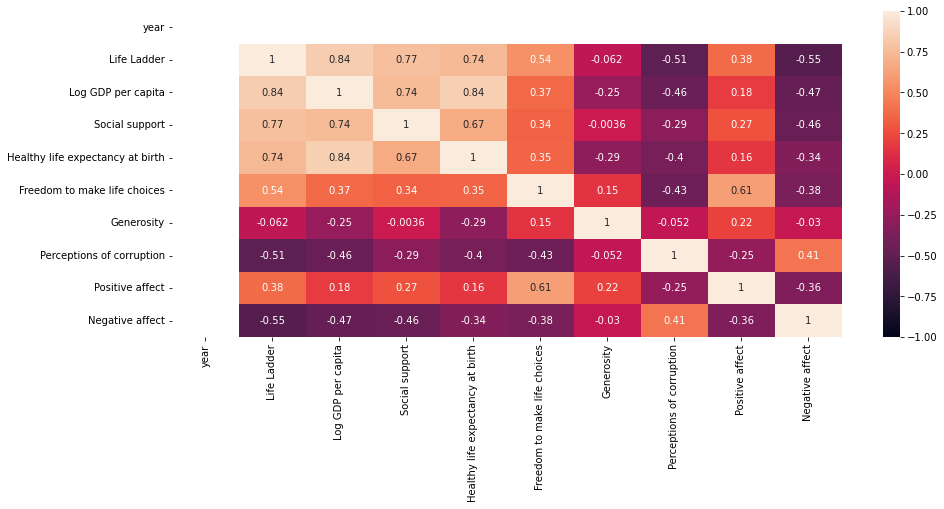

In [120]:
plt.figure(figsize=(15,6))
sns.heatmap(bonus_df.corr(), vmin=-1, vmax=1, annot=True)